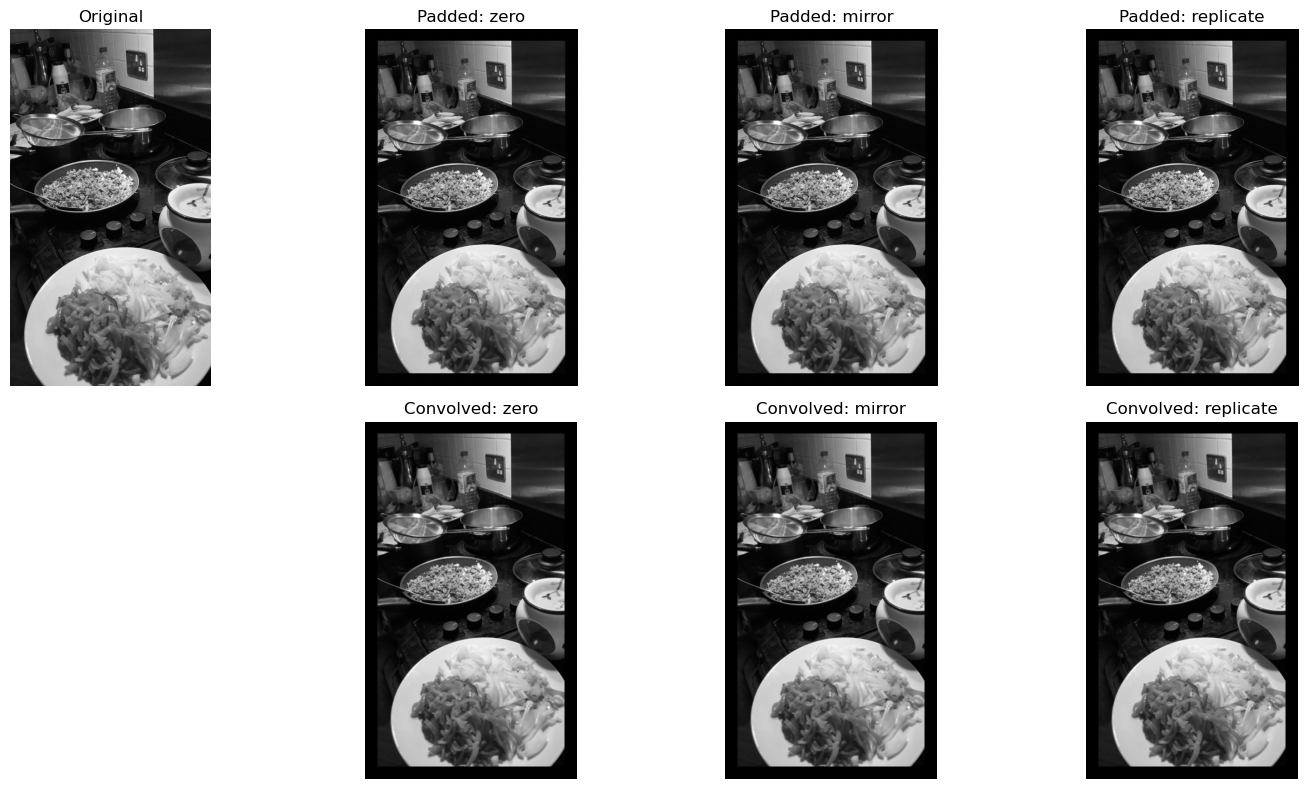

In [7]:
import numpy as np
import cv2
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def apply_padding(img, pad_width, mode):
    top, bottom, left, right = pad_width
    if mode == 'zero':
        return np.pad(img, ((top, bottom), (left, right)), mode='constant', constant_values=1)
    elif mode == 'mirror':
        return np.pad(img, ((top, bottom), (left, right)), mode='reflect')
    elif mode == 'replicate':
        return np.pad(img, ((top, bottom), (left, right)), mode='edge')
    else:
        raise ValueError("Unknown mode")

def apply_convolution(img, kernel):
    return convolve2d(img, kernel, mode='valid')

if __name__ == "__main__":
    img = cv2.imread(rf'C:\Users\Wahaj Sajid\Desktop\home_made_food.jpg', cv2.IMREAD_GRAYSCALE)
    pad_width = (1000, 1000, 1000, 1000)  # Large padding to make padding visible

    kernel = np.ones((3, 3), dtype=np.float16) / 9.0
    modes = ['zero', 'mirror', 'replicate']

    plt.figure(figsize=(15, 8))
    plt.subplot(2, len(modes)+1, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    for i, mode in enumerate(modes):
        padded_img = padded_img.astype(np.float32)
        conv_img = apply_convolution(padded_img, kernel)
        
        plt.subplot(2, len(modes)+1, i+2)
        plt.title(f'Padded: {mode}')
        plt.imshow(padded_img, cmap='gray')
        plt.axis('off')
        
        plt.subplot(2, len(modes)+1, i+2+len(modes)+1)
        plt.title(f'Convolved: {mode}')
        plt.imshow(conv_img, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()